Are there any counties in the U.S. that exceed the national standard of 12 micrograms per cubic meter for fine particle pollution?

In [1]:
# I couldn't find the data on the EPA website, but a google search for 'avgpm25.csv' turned up a few copies

# read in data
class <- c("numeric", "character", "factor", "numeric", "numeric")
pollution <- read.csv("avgpm25.csv", colClasses = class)
head(pollution)

,pm25,fips,region,longitude,latitude
,<dbl>,<chr>,<fct>,<dbl>,<dbl>
1,9.771185,01003,east,-87.74826,30.59278
2,9.993817,01027,east,-85.84286,33.26581
3,10.688618,01033,east,-87.72596,34.73148
4,11.337424,01049,east,-85.79892,34.45913
5,12.119764,01055,east,-86.03212,34.01860
6,10.827805,01069,east,-85.35039,31.18973


In [2]:
str(pollution)

'data.frame':	576 obs. of  5 variables:
 $ pm25     : num  9.77 9.99 10.69 11.34 12.12 ...
 $ fips     : chr  "01003" "01027" "01033" "01049" ...
 $ region   : Factor w/ 2 levels "east","west": 1 1 1 1 1 1 1 1 1 1 ...
 $ longitude: num  -87.7 -85.8 -87.7 -85.8 -86 ...
 $ latitude : num  30.6 33.3 34.7 34.5 34 ...


# Simple Summaries, one dimension

1. Five-number summary
1. Boxplots
1. Histograms
1. Barplot
1. Density plot


## 1. Five-number summary

In [3]:
# Five-number summary
# Returns Tukey's five number summary (minimum, lower-hinge, median, upper-hinge, maximum) for the input data.
fivenum(pollution$pm25)
summary(pollution$pm25)

[1]  3.382626  8.547590 10.046697 11.356829 18.440731

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.383   8.549  10.047   9.836  11.356  18.441 

## 2. Box plot

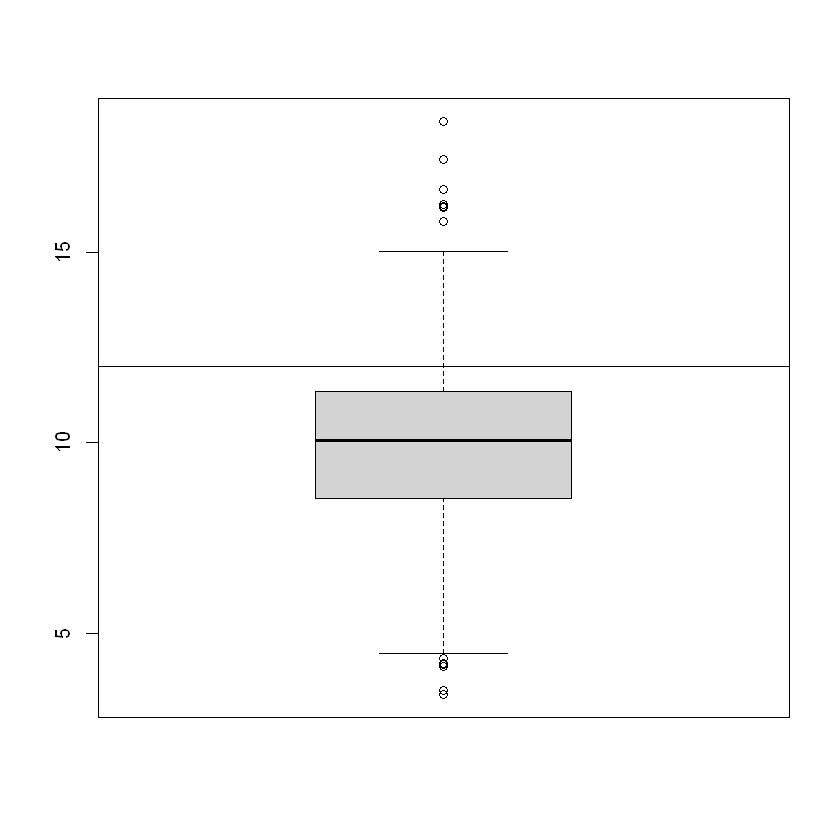

In [4]:
boxplot(pollution$pm25)
# annotations are good!  Since we knew the national standard is at 12, we can add a reference line
abline(h=12)

In [5]:
# look at the outliers
library(dplyr)
filter(pollution, pm25 > 15)

# note this are all in the west


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




pm25,fips,region,longitude,latitude
<dbl>,<chr>,<fct>,<dbl>,<dbl>
16.19452,06019,west,-119.9035,36.63837
15.80378,06029,west,-118.6833,35.29602
18.44073,06031,west,-119.8113,36.15514
16.66180,06037,west,-118.2342,34.08851
15.01573,06047,west,-120.6741,37.24578
17.42905,06065,west,-116.8036,33.78331
16.25190,06099,west,-120.9588,37.61380
16.18358,06107,west,-119.1661,36.23465


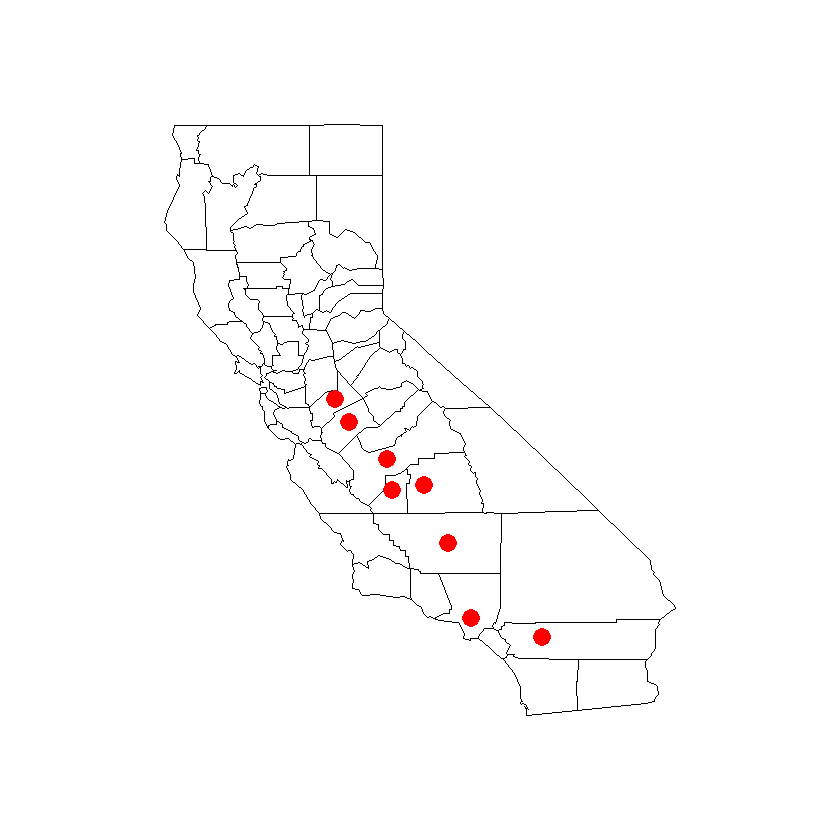

In [6]:
# in fact, the '06' prefix on the fips code is california, so let's see where these are on a map
library(maps)
map('county','california')
with(filter(pollution, pm25 > 15), points(longitude, latitude, col='red', pch=16, cex=2))


## 3. Histogram

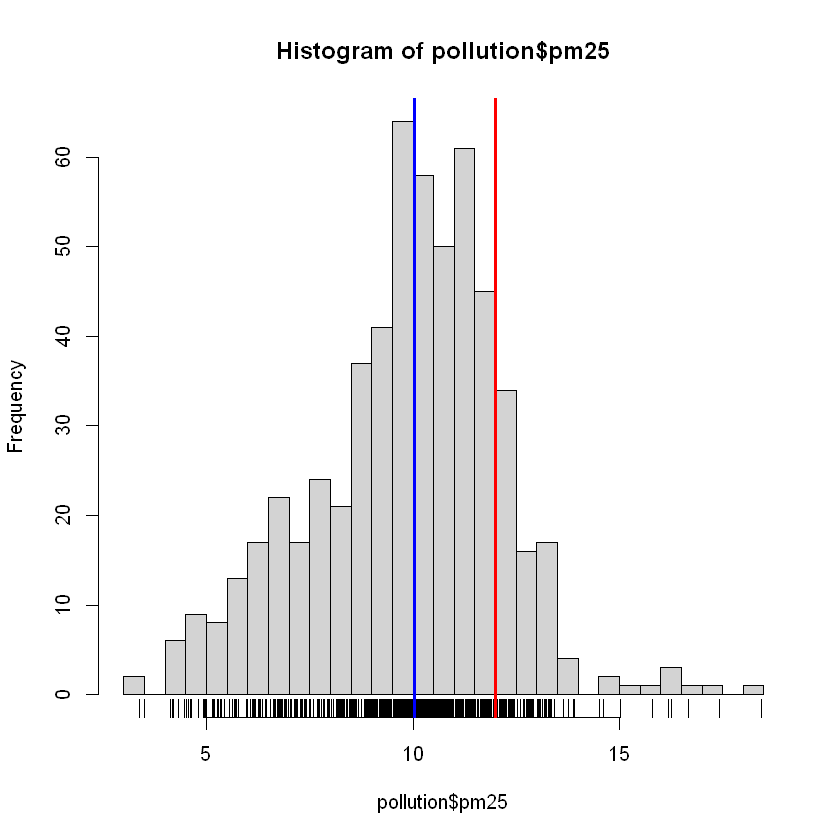

In [7]:
#hist() has a automatic binnig, but if we want to force it we use breaks
hist(pollution$pm25, breaks = 30)
#rug adds the individual points at the bottom
rug(pollution$pm25)

#more reference lines... the national standard
abline(v=12, lwd=3, col='red')
abline(v = median(pollution$pm25), lwd=3, col='blue')

## 4. Barplot

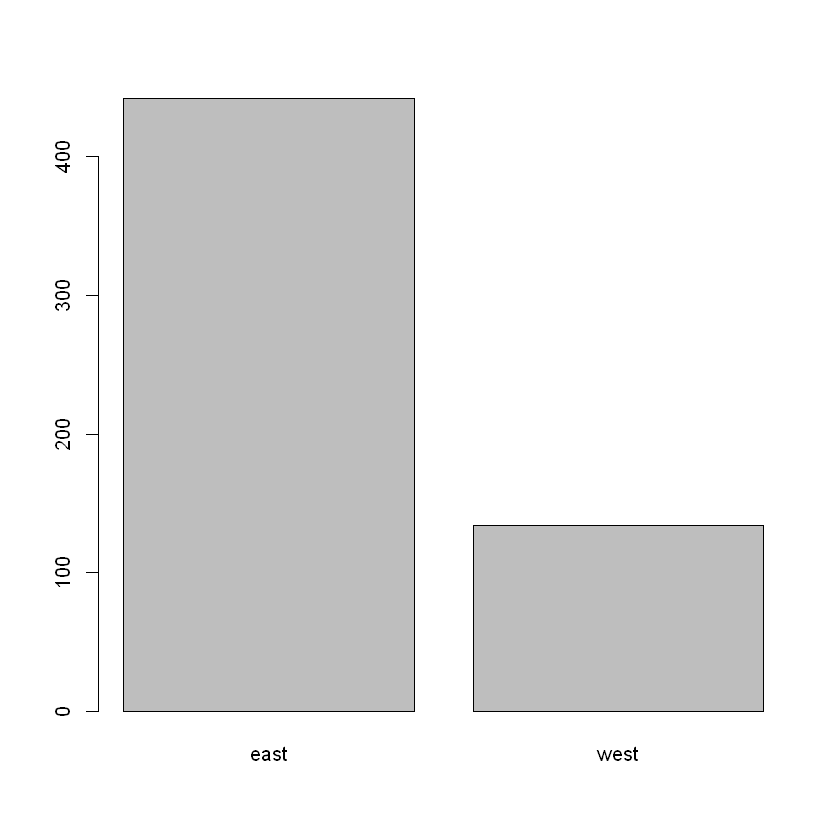

In [8]:
# good for categorical data counting
table(pollution$region) %>%
barplot

## 5. Density plot

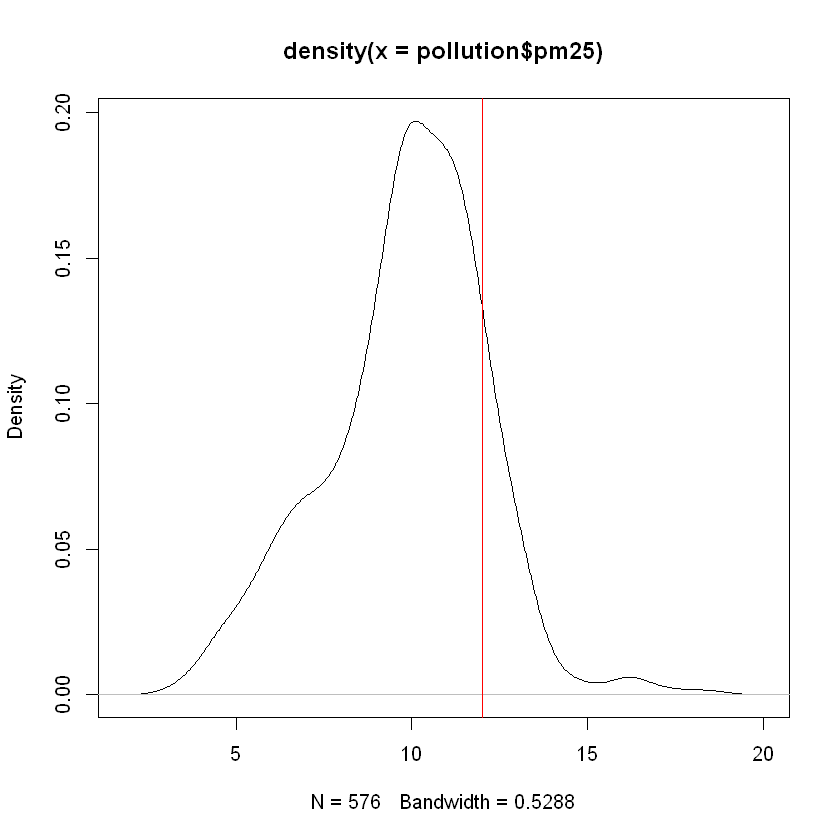

In [9]:
density(pollution$pm25) %>%
plot()
abline(v=12, col='red')

# Simple Summaries: 2 dimensions or more

1. Multiple boxplots
1. Multiple histograms
1. Scatterplots
1. Multiple scatterplots


## 1. Multiple boxplots

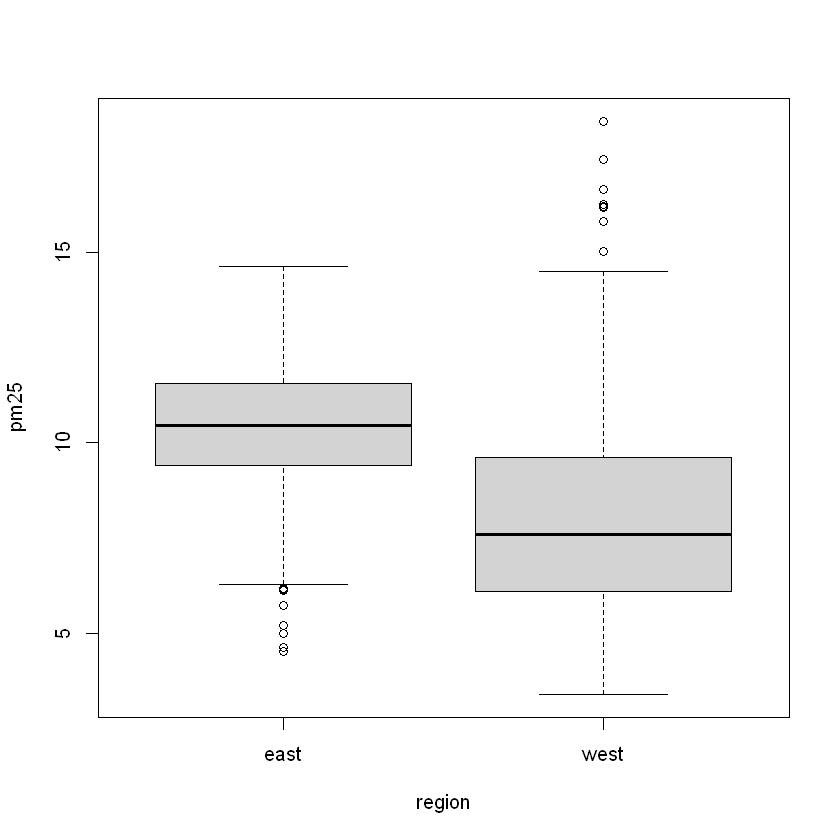

In [10]:
# field ~ thing to split by
boxplot(pm25 ~ region, data = pollution)

## 2. Multiple histograms

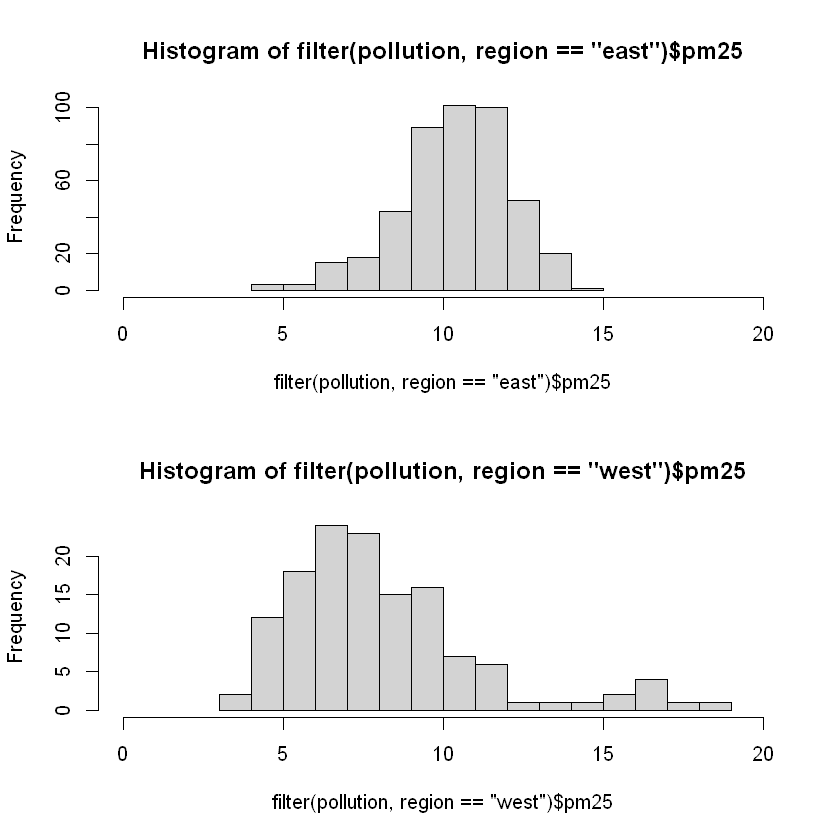

In [11]:
# the first line of code sets us the partitions of the display

# c(num.rows, num.cols). mfrow is the drawing order of how the partition gets filled in,
# using the subsequent lines of code for the plots
par(mfrow = c(2,1))
hist(filter(pollution, region=='east')$pm25, xlim = c(0,20), breaks = 10)
hist(filter(pollution, region=='west')$pm25, xlim = c(0,20), breaks = 11)

## 3. Scatterplots

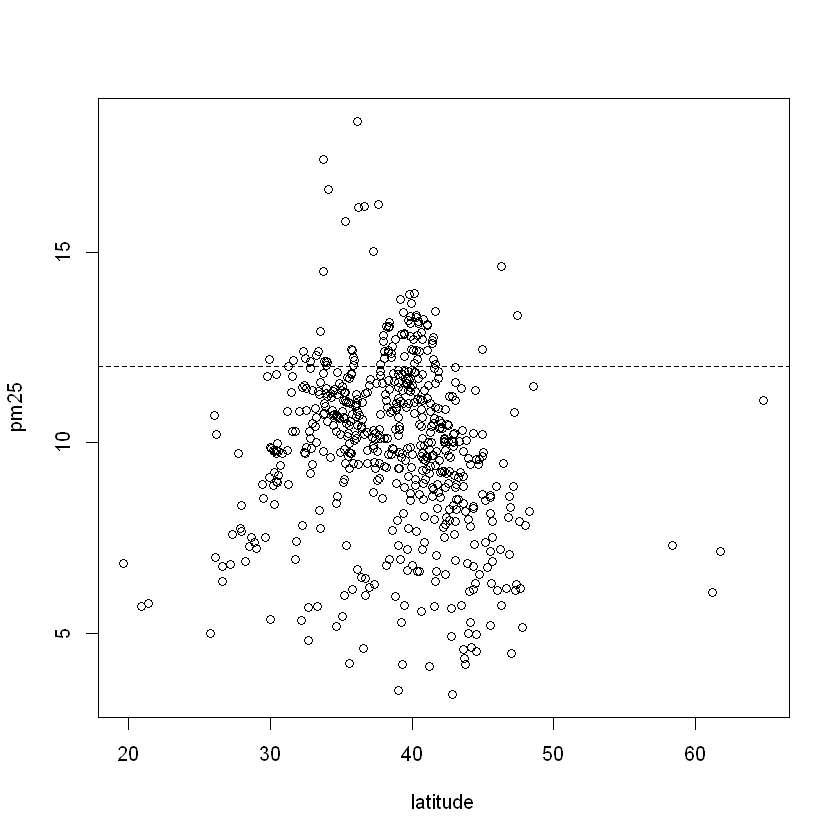

In [12]:
with(pollution, plot(latitude, pm25))
abline(h=12, lty =2)

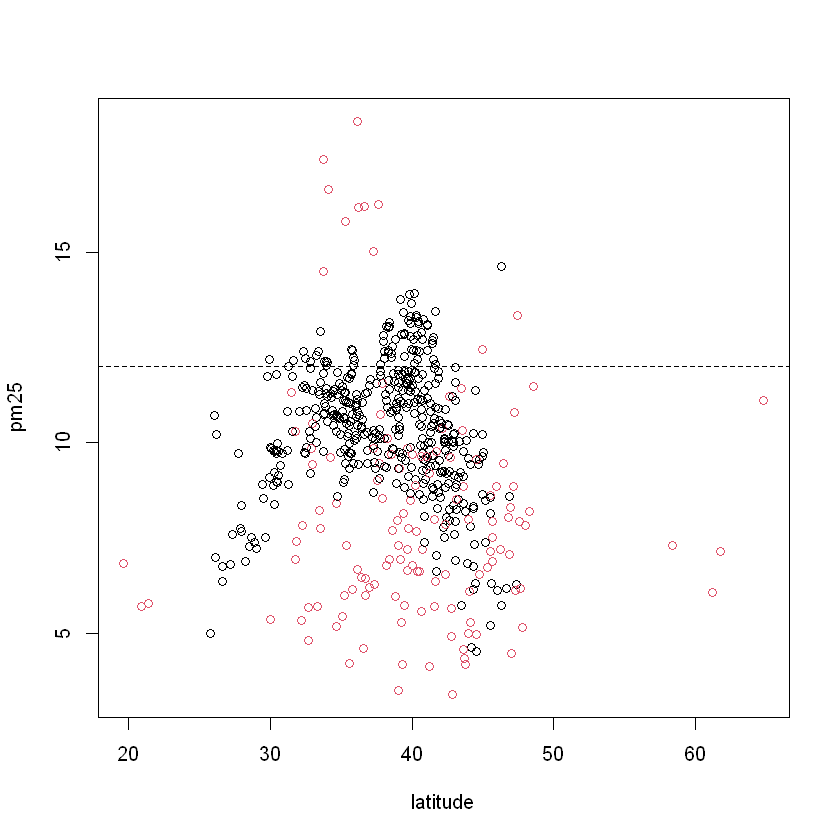

In [13]:
# with color
with(pollution, plot(latitude, pm25, col = region))
abline(h=12, lty =2)


## 4. Multiple scatterplots

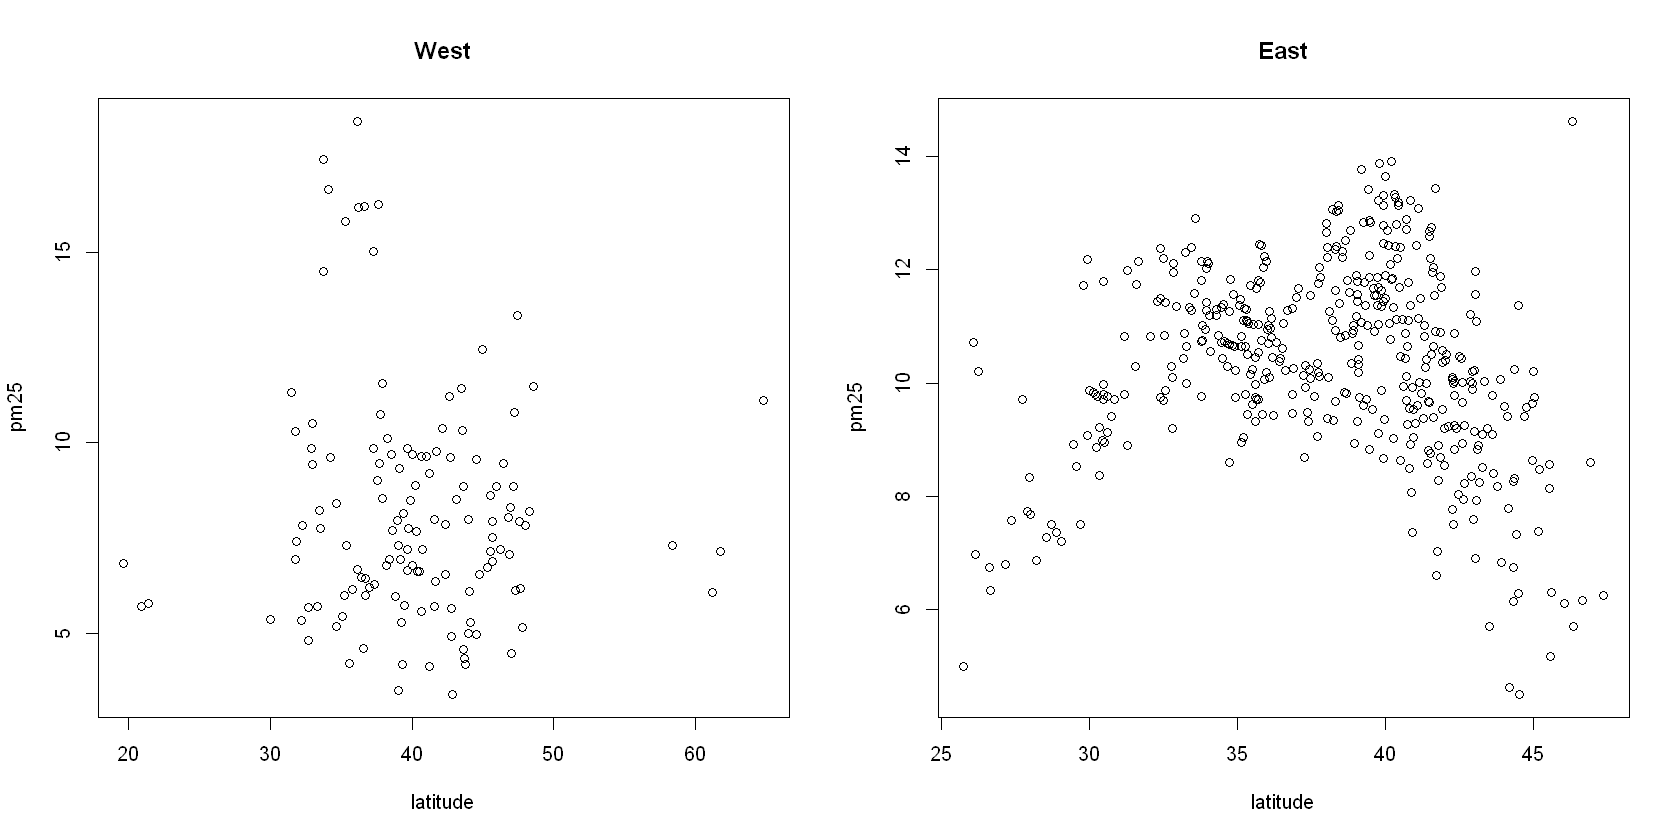

In [16]:
#make graph wider
options(repr.plot.width=14)

# c(1,2) one row, two columns
par(mfrow=c(1,2))
with(filter(pollution, region=='west'), plot(latitude, pm25, main='West'))
with(filter(pollution, region=='east'), plot(latitude, pm25, main='East'))

# return to default size
options(repr.plot.width=7)

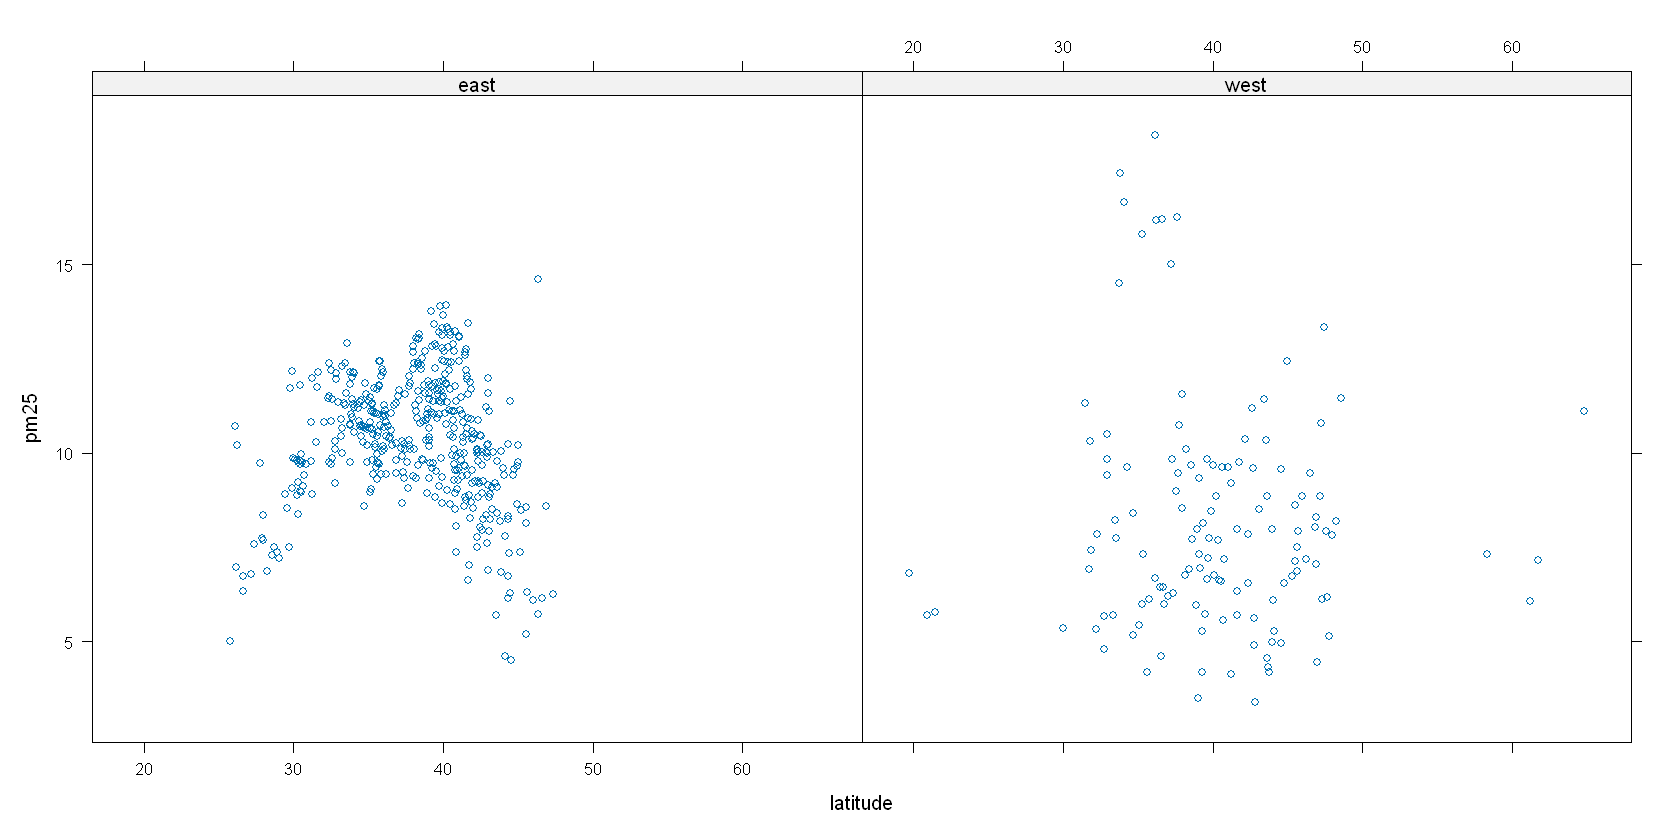

In [33]:
#make graph wider
options(repr.plot.width=14)

# alternative 1, lattice library
library(lattice)
xyplot(pm25 ~ latitude | region, data = pollution)

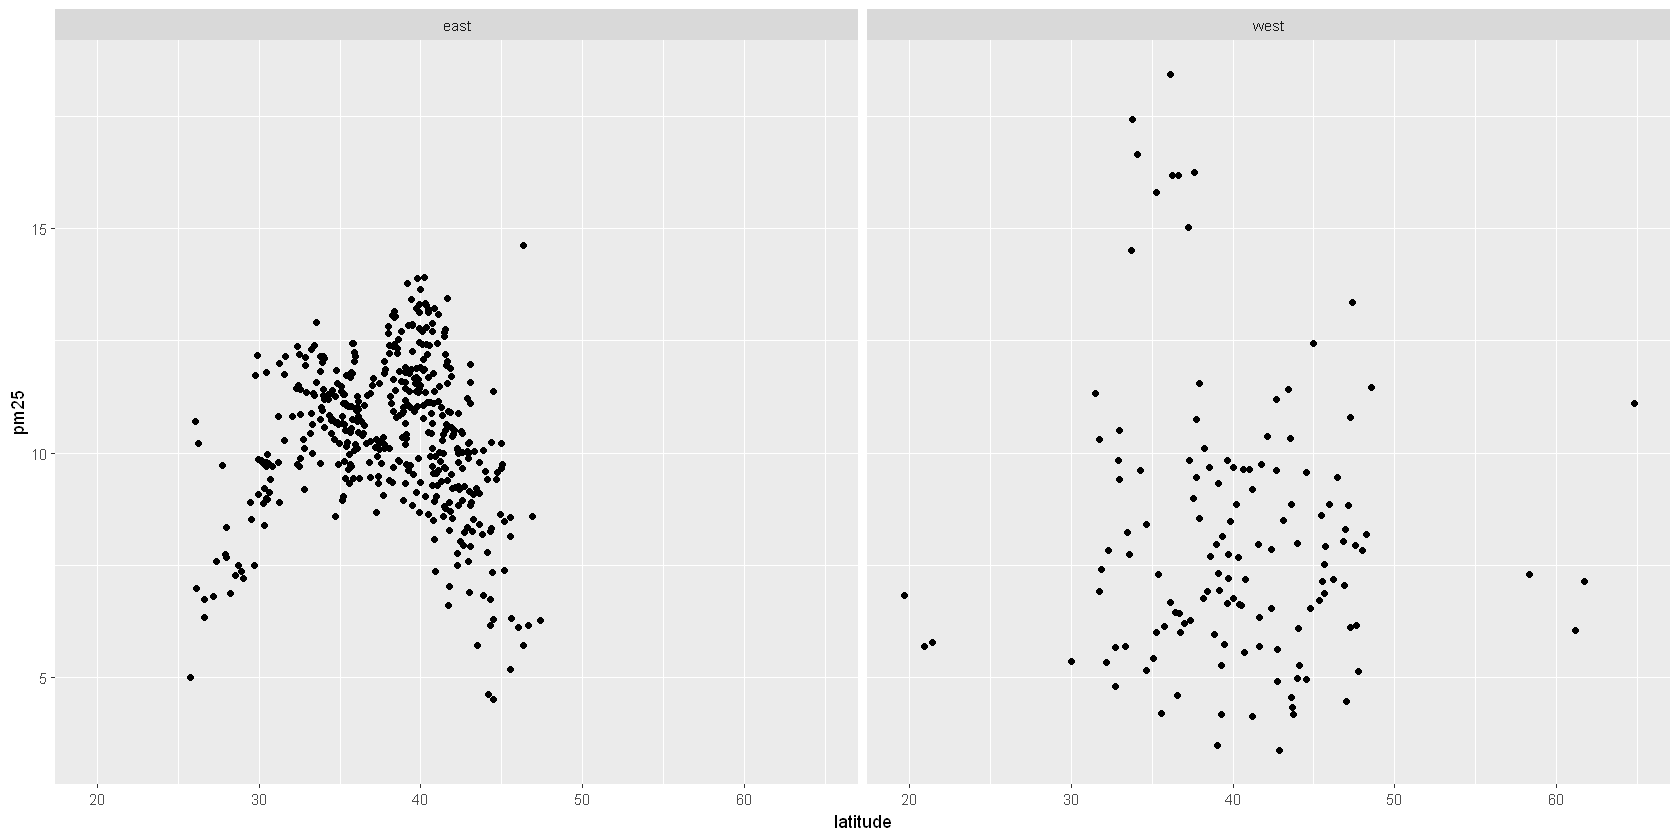

In [34]:
# alternative #2, ggplot
library(ggplot2)
qplot(latitude, pm25, data=pollution, facets = . ~ region)

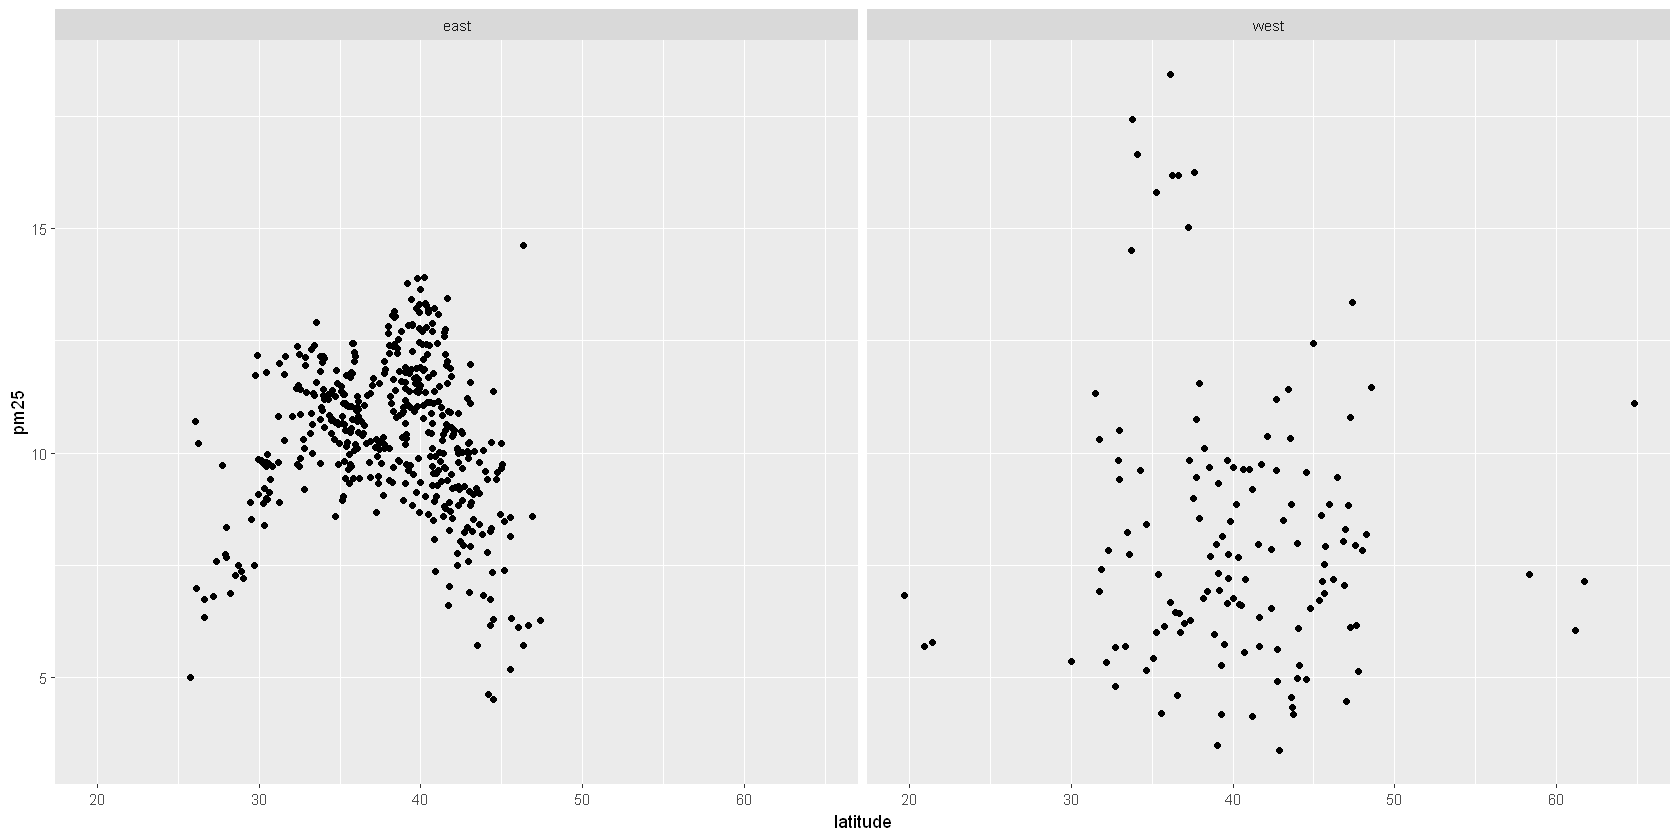

In [36]:
# depricated?  we are supposed to use ggplot() now... let's figure it out
ggplot(data=pollution, aes(x=latitude, y=pm25)) + geom_point() + facet_wrap(~region, nrow=1)

# return to default size
options(repr.plot.width=7)